In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os, shutil
import warnings
import random
import cv2
warnings.filterwarnings('ignore')

In [4]:
train_path = 'FloresNativas-sin-modificaciones/train'
validation_path = 'FloresNativas-sin-modificaciones/valid'
test_path = 'FloresNativas-sin-modificaciones/test'
train_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/train/Ananuca/'))
train_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/train/Azulillo/'))
train_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/train/Chagual/'))
train_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/train/Chilco/'))
train_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/train/Copihue/'))
validation_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/valid/Ananuca/'))
validation_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/valid/Azulillo/'))
validation_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chagual/'))
validation_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chilco/'))
validation_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/valid/Copihue/'))
test_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/test/Ananuca/'))
test_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/test/Azulillo/'))
test_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/test/Chagual/'))
test_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/test/Chilco/'))
test_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/test/Copihue/'))
image_categories = os.listdir('FloresNativas-sin-modificaciones/train')

print("NÚMERO TOTAL DE IMÁGENES A UTILIZAR : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue +
test_path_ananuca + test_path_azulillo + test_path_chagual + test_path_chilco + test_path_copihue + validation_path_ananuca + validation_path_azulillo + 
validation_path_chagual + validation_path_chilco + validation_path_copihue ))
print('-----------------------------------------------------')
print("SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Entrenamiento  : {}".format(train_path_ananuca))
print("Set de imágenes de Azulillo para Entrenamiento : {}".format(train_path_azulillo))
print("Set de imágenes de Chagual para Entrenamiento  : {}".format(train_path_chagual))
print("Set de imágenes de Chilco para Entrenamiento   : {}".format(train_path_chilco))
print("Set de imágenes de Copihue para Entrenamiento  : {}".format(train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Validación  : {}".format(validation_path_ananuca))
print("Set de imágenes de Azulillo para Validación : {}".format(validation_path_azulillo))
print("Set de imágenes de Chagual para Validación  : {}".format(validation_path_chagual))
print("Set de imágenes de Chilco para Validación   : {}".format(validation_path_chilco))
print("Set de imágenes de Copihue para Validación  : {}".format(validation_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Testing  : {}".format(test_path_ananuca))
print("Set de imágenes de Azulillo para Testing : {}".format(test_path_azulillo))
print("Set de imágenes de Chagual para Testing  : {}".format(test_path_chagual))
print("Set de imágenes de Chilco para Testing   : {}".format(test_path_chilco))
print("Set de imágenes de Copihue para Testing  : {}".format(test_path_copihue))
print('-----------------------------------------------------')


NÚMERO TOTAL DE IMÁGENES A UTILIZAR : 2750
-----------------------------------------------------
SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : 1925
-----------------------------------------------------
Set de imágenes de Añañuca para Entrenamiento  : 372
Set de imágenes de Azulillo para Entrenamiento : 393
Set de imágenes de Chagual para Entrenamiento  : 390
Set de imágenes de Chilco para Entrenamiento   : 394
Set de imágenes de Copihue para Entrenamiento  : 376
-----------------------------------------------------
Set de imágenes de Añañuca para Validación  : 115
Set de imágenes de Azulillo para Validación : 104
Set de imágenes de Chagual para Validación  : 104
Set de imágenes de Chilco para Validación   : 113
Set de imágenes de Copihue para Validación  : 114
-----------------------------------------------------
Set de imágenes de Añañuca para Testing  : 63
Set de imágenes de Azulillo para Testing : 53
Set de imágenes de Chagual para Testing  : 56
Set de imágenes de Chilco para Testing

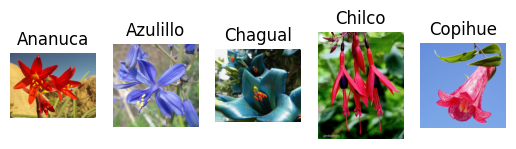

In [5]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(10, 10))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(1, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()


In [5]:
#MOSTRAR EJEMPLOS DE CADA CLASE

In [6]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_set = train_gen.flow_from_directory(
 train_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')


Found 1925 images belonging to 5 classes.


In [7]:
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_set = train_gen.flow_from_directory(
 validation_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')

Found 550 images belonging to 5 classes.


In [8]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_set = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=5,
 class_mode='categorical')

Found 275 images belonging to 5 classes.


In [9]:
class_map = dict([(v, k) for k, v in train_set.class_indices.items()])
print(class_map)

{0: 'Ananuca', 1: 'Azulillo', 2: 'Chagual', 3: 'Chilco', 4: 'Copihue'}


# MODELO DESDE CERO 

#### Cargamos la clase para generar los modelos sequenciales

In [ ]:
from keras.models import Sequential

#### Se cargan las siguientes capas

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential() # model object

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',
input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_set,
                 epochs=1,
                 verbose=1, 
                 validation_data=val_set,
                 steps_per_epoch = 1925//30,
                 validation_steps = 550//30,
                 callbacks=early_stopping)

64/64 [==============================] - 9s 97ms/step - loss: 1.2568 - accuracy: 0.5113 - val_loss: 0.6661 - val_accuracy: 0.7000


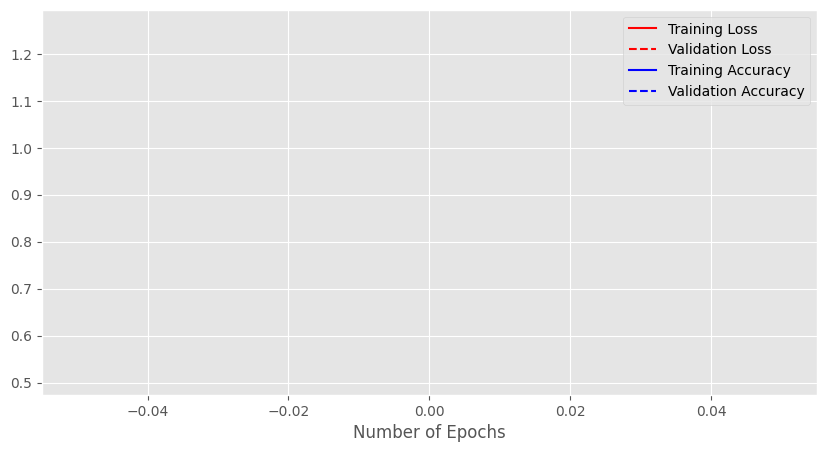

In [16]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

#### Predecir la precisión para el set de testeo

In [17]:
model.evaluate(test_set)

55/55 [==============================] - 1s 20ms/step - loss: 0.6090 - accuracy: 0.7273


[0.6089697480201721, 0.7272727489471436]

#### Testear el Modelo

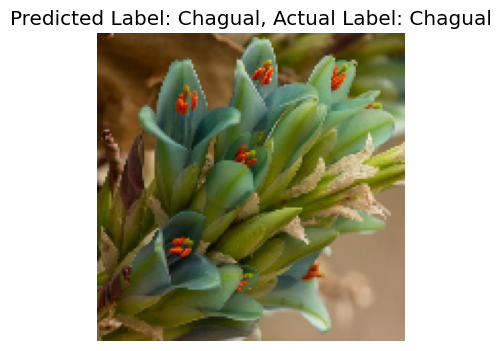

In [18]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Chagual/Screenshot_435_png.rf.9a7a0fd04cdc261073a7eeae4d8051c3.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #Cargar y preprocesar la imagen
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Realizar las predicciones
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Llamar a la función
generate_predictions(test_image_path, actual_label='Chagual') 

#### Guardar el modelo 

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
      json_file.write(model_json)
model.save_weights('modelodecero.h5')
print("Guardado con exito.")

# MODELO ResNet50

In [19]:
from tensorflow.keras.applications.resnet import ResNet50

resnet = ResNet50(include_top=False,
        weights='imagenet',
        input_shape=(150,150,3))
for layer in resnet.layers:
    layer.trainable = False
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 256005    
                                                                 
Total params: 23,843,717
Trainable params: 256,005
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
resnet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
77/77 [==============================] - 11s 107ms/step - loss: 1.8120 - accuracy: 0.2914 - val_loss: 1.4406 - val_accuracy: 0.3927
Epoch 2/5
77/77 [==============================] - 7s 89ms/step - loss: 1.3375 - accuracy: 0.4519 - val_loss: 1.3263 - val_accuracy: 0.4636
Epoch 3/5
77/77 [==============================] - 7s 89ms/step - loss: 1.1971 - accuracy: 0.5065 - val_loss: 1.4121 - val_accuracy: 0.4036
Epoch 4/5
77/77 [==============================] - 7s 88ms/step - loss: 1.1231 - accuracy: 0.5678 - val_loss: 1.0843 - val_accuracy: 0.5655
Epoch 5/5
77/77 [==============================] - 7s 88ms/step - loss: 1.0355 - accuracy: 0.6047 - val_loss: 1.0540 - val_accuracy: 0.5982


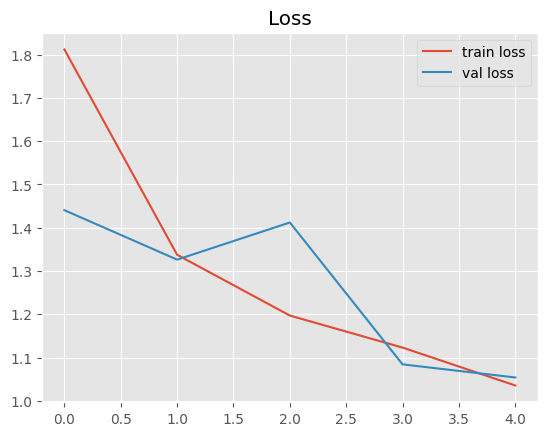

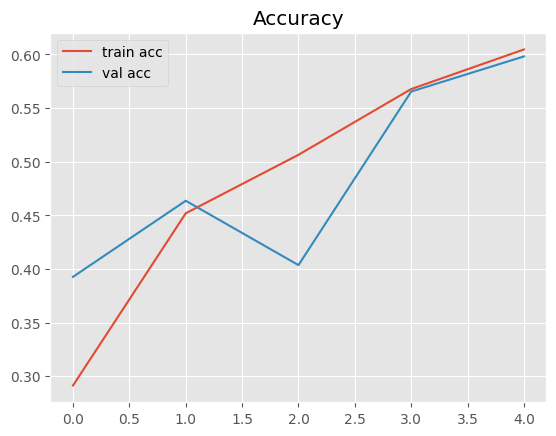

In [21]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [22]:
resnet_auc = model.evaluate(test_set)

55/55 [==============================] - 2s 29ms/step - loss: 0.9522 - accuracy: 0.6473


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

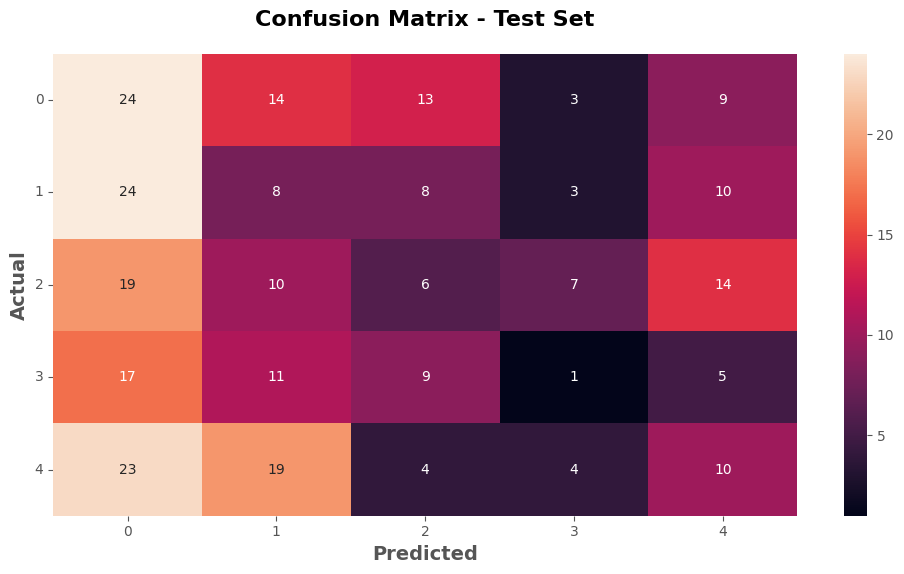

In [23]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
 test_labels,
 test_pred,
 num_classes=None,
 weights=None,
 dtype=tf.dtypes.int32,
 name=None,
),annot = True,
 fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.22      0.38      0.28        63
           1       0.13      0.15      0.14        53
           2       0.15      0.11      0.12        56
           3       0.06      0.02      0.03        43
           4       0.21      0.17      0.19        60

    accuracy                           0.18       275
   macro avg       0.15      0.17      0.15       275
weighted avg       0.16      0.18      0.16       275



# MODELO SVM 

In [27]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
import mlxtend
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
ruta = "./FloresNativas-sin-modificaciones"
print(os.listdir(ruta))
dim = 100

['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


In [28]:
def getFlowers(flowers, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['train', 'test']
    if not k_fold:
        path = "./FloresNativas-sin-modificaciones/" + data_type + "/"
        for i,f in enumerate(flowers):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("Existen " , j , " imágenes de  " , data_type.upper(), " de " ,flowers[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "./FloresNativas-sin-modificaciones/" + v + "/"
            for i,f in enumerate(flowers):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels




In [ ]:
# def getAllFlowers():
#  flowers = []
#  for flower_path in glob.glob("FloresNativas-sin-modificaciones/*"): #esto lo puede editar 
#     flower = flower_path.split("/")[-1]
#     flowers.append(flower)
#  return flowers

# print (flowers)



In [29]:
flowers = ['Ananuca', 'Azulillo', 'Chagual', 'Chilco', 'Copihue']
#fruits = getAllFruits() #Be sure to have enough free memory
#Get Images and Labels
X_t, y_train = getFlowers(flowers, 'train', print_n=True, k_fold=False )
X_test, y_test = getFlowers(flowers, 'test' , print_n=True, k_fold=False)

#Get data for k-fold
X,y = getFlowers(flowers, '', print_n=True, k_fold=True)


#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])


Existen  372  imágenes de   TRAIN  de  ANANUCA
Existen  393  imágenes de   TRAIN  de  AZULILLO
Existen  390  imágenes de   TRAIN  de  CHAGUAL
Existen  394  imágenes de   TRAIN  de  CHILCO
Existen  376  imágenes de   TRAIN  de  COPIHUE
Existen  63  imágenes de   TEST  de  ANANUCA
Existen  53  imágenes de   TEST  de  AZULILLO
Existen  56  imágenes de   TEST  de  CHAGUAL
Existen  43  imágenes de   TEST  de  CHILCO
Existen  60  imágenes de   TEST  de  COPIHUE


In [30]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

In [31]:
def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = flowers[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
   
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = flowers[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=flowers, yticklabels=flowers,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

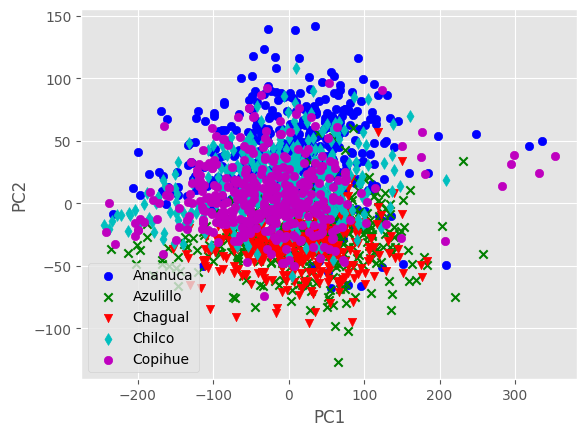

In [33]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

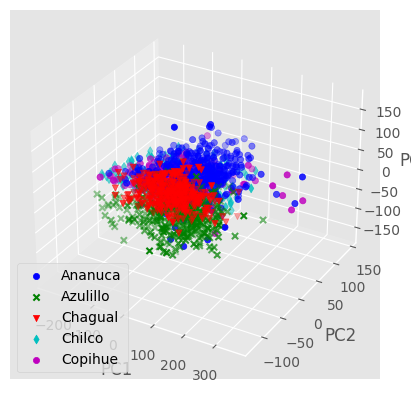

In [34]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

Accuracy with SVM: 79.64%


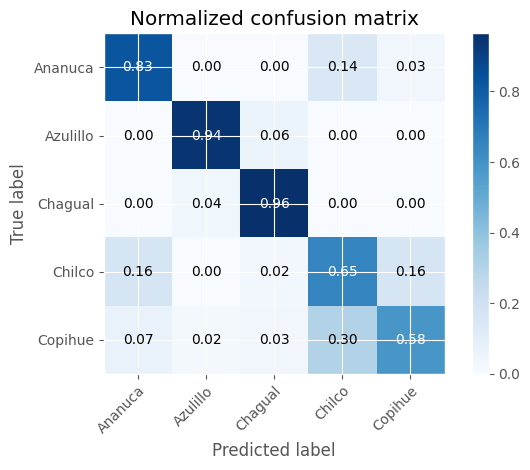

In [35]:
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train,
normalize=True, title='Normalized confusion matrix')
plt.show()

In [36]:
pred_kfold = cross_val_score(svm, X, y, cv=5)
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.80 (+/- 0.04)


In [38]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [39]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# COMPARACIÓN DE LOS MODELOS